In [53]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [54]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("Resources/survey.csv",
                 index_col="Timestamp",
                 parse_dates=True
                )

# Preview the dataset
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [55]:

df['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [56]:
df.shape

(1259, 26)

In [57]:
print('check for null values')
df.isna().sum()

check for null values


Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [58]:
print('check for null values')
df.isna().sum()

check for null values


Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [59]:
print('drop uncessary columns')
''' need to decide which columns to drop
df.drop(['Country'], axis=1, inplace=True)
'''

drop uncessary columns


" need to decide which columns to drop\ndf.drop(['Country'], axis=1, inplace=True)\n"

In [60]:
#print("drop nulls")
''' need to filter before running this:
df.dropna(how='any', axis=0, inplace=True)
'''
display(df['seek_help'].value_counts())
display(df['benefits'].value_counts())
display(df['care_options'].value_counts())
display(df['wellness_program'].value_counts())
display(df['leave'].value_counts())
display(df['mental_health_consequence'].value_counts())
display(df['phys_health_consequence'].value_counts())


seek_help
No            646
Don't know    363
Yes           250
Name: count, dtype: int64

benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

care_options
No          501
Yes         444
Not sure    314
Name: count, dtype: int64

wellness_program
No            842
Yes           229
Don't know    188
Name: count, dtype: int64

leave
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: count, dtype: int64

mental_health_consequence
No       490
Maybe    477
Yes      292
Name: count, dtype: int64

phys_health_consequence
No       925
Maybe    273
Yes       61
Name: count, dtype: int64

In [61]:
my_df = df[['work_interfere','benefits','care_options','wellness_program','seek_help','leave','mental_health_consequence','phys_health_consequence']]
big_df = df[['work_interfere','family_history','treatment','remote_work','tech_company','anonymity','coworkers','supervisor','mental_health_interview', 'phys_health_interview','mental_vs_physical','obs_consequence']]

#Code below removes all 'don't know and NaN' values from my_df and results in df_filtered1
columns_to_check = ['benefits', 'wellness_program', 'seek_help', 'leave']

df_filtered = my_df[~my_df[columns_to_check].apply(lambda row: row.isin(["Don't know"]).any(), axis=1)]
df_filtered1 = df_filtered[df_filtered['care_options'] != "Not sure"]
df_filtered1 = df_filtered1.dropna(subset=['work_interfere'])

#Same for big_df, except with optimized code that allows it to retain its original name
big_df.drop(big_df[big_df['anonymity'] == "Don't know"].index, inplace=True)
big_df.drop(big_df[big_df['mental_vs_physical'] == "Don't know"].index, inplace=True)
big_df.drop(big_df[big_df['anonymity'] == "Don't know"].index, inplace=True)
big_df = big_df.dropna(subset=['work_interfere'])






C:\Users\Connor\AppData\Local\Temp\ipykernel_15656\364397257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df.drop(big_df[big_df['anonymity'] == "Don't know"].index, inplace=True)
C:\Users\Connor\AppData\Local\Temp\ipykernel_15656\364397257.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df.drop(big_df[big_df['mental_vs_physical'] == "Don't know"].index, inplace=True)
C:\Users\Connor\AppData\Local\Temp\ipykernel_15656\364397257.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [62]:
#Changing values to fit the Y/N/Maybe numerical system i build later
condense_mapping = {
    'Somewhat easy': 'Easy',
    'Very easy': 'Easy',
    'Somewhat difficult': 'Difficult',
    'Very difficult': 'Difficult'
}
df_filtered1['leave'] = df_filtered1['leave'].replace(condense_mapping)

#Same as above
fun_mapping = {'Some of them':'Maybe'}

big_df['coworkers'] = big_df['coworkers'].replace(fun_mapping)

#changing work interfere into y/n as oppposed to 4 answers to help with correlation w/ small sample size, only works for temp_df though, not big_df, unsure why
silly_mapping = {
    'Never': 'No',
    'Rarely': 'No',
    'Sometimes': 'Yes',
    'Often': 'Yes'
}
df_filtered1['work_interfere'] = df_filtered1['work_interfere'].replace(silly_mapping)
#big_df['work_interfere'] = big_df['work_interfere'].replace(silly_mapping)




In [63]:
#Dictionaries for maps I will be applying to all of my new columns. 
map1 = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
map2 = {'No': 0, 'Maybe': 1, 'Yes': 2}
map3 = {'No': 0, 'Yes': 2}
map4 = {'Difficult':0, 'Easy':2}

#Creating new columns by applying the map function to referenced column, converting all words to numbers 0-2
df_filtered1['work_interfere_encoded'] = df_filtered1['work_interfere'].map(map1)
df_filtered1['benefits_encoded'] = df_filtered1['benefits'].map(map3)
df_filtered1['care_options_encoded'] = df_filtered1['care_options'].map(map3)
df_filtered1['wellness_program_encoded'] = df_filtered1['wellness_program'].map(map3)
df_filtered1['seek_help_encoded'] = df_filtered1['seek_help'].map(map3)
df_filtered1['leave_encoded'] = df_filtered1['leave'].map(map4)
df_filtered1['mental_health_consequence_encoded'] = df_filtered1['mental_health_consequence'].map(map2)
df_filtered1['phys_health_consequence_encoded'] = df_filtered1['phys_health_consequence'].map(map2)


#Same with big df
big_df['work_interfere_encoded'] = big_df['work_interfere'].map(map1)
big_df['family_history_encoded'] = big_df['family_history'].map(map3)
big_df['treatment_encoded'] = big_df['treatment'].map(map3)
big_df['remote_work_encoded'] = big_df['remote_work'].map(map3)
big_df['tech_company_encoded'] = big_df['tech_company'].map(map3)
big_df['anonymity_encoded'] = big_df['anonymity'].map(map3)
big_df['coworkers_encoded'] = big_df['coworkers'].map(map2)
big_df['supervisor_encoded'] = big_df['supervisor'].map(map3)
big_df['obs_consequence_encoded'] = big_df['obs_consequence'].map(map3)
big_df['mental_health_interview_encoded'] = big_df['mental_health_interview'].map(map2)
big_df['phys_health_interview_encoded']  = big_df['phys_health_interview'].map(map2)
big_df['mental_vs_physical_encoded'] = big_df['mental_vs_physical'].map(map3)

#Created a copy because I confused myself, will program this out later, but temp_df is the new df_filtered1
temp_df = df_filtered1.copy()

temp_df['work_interfere_encoded'] = temp_df['work_interfere'].map(map3)
#big_df['work_interfere_encoded'] = big_df['work_interfere'].map(map3)

#goes through all columns in df, selects all itemtypes = int64 and float64 saves to variable
numeric_columns_temp = temp_df.select_dtypes(include=['int64', 'float64']).columns

#Goes into temp_df, takes all the columns with numerical values and correlates them all against work_interfere_encoded
correlations_temp = temp_df[numeric_columns_temp].corr()['work_interfere_encoded'].sort_values(ascending=False)

#Same as above with other df, need to figure out how to change work_interfere to 2 answers instead of 4 to be consistent with other data set, but only like a 5% change so.. will do later :)           
numeric_columns_big = big_df.select_dtypes(include=['int64', 'float64']).columns
correlations_big = big_df[numeric_columns_big].corr()['work_interfere_encoded'].sort_values(ascending=False)
correlations_big.dtypes
display(correlations_temp)
display(correlations_big)





work_interfere_encoded               1.000000
mental_health_consequence_encoded    0.097573
phys_health_consequence_encoded      0.077444
care_options_encoded                -0.022188
benefits_encoded                    -0.055253
leave_encoded                       -0.091073
wellness_program_encoded            -0.113929
seek_help_encoded                   -0.142600
Name: work_interfere_encoded, dtype: float64

work_interfere_encoded             1.000000
treatment_encoded                  0.514629
obs_consequence_encoded            0.276690
family_history_encoded             0.261542
phys_health_interview_encoded      0.065088
remote_work_encoded               -0.003699
coworkers_encoded                 -0.017487
anonymity_encoded                 -0.038373
mental_health_interview_encoded   -0.076426
tech_company_encoded              -0.093566
supervisor_encoded                -0.133909
mental_vs_physical_encoded        -0.156797
Name: work_interfere_encoded, dtype: float64

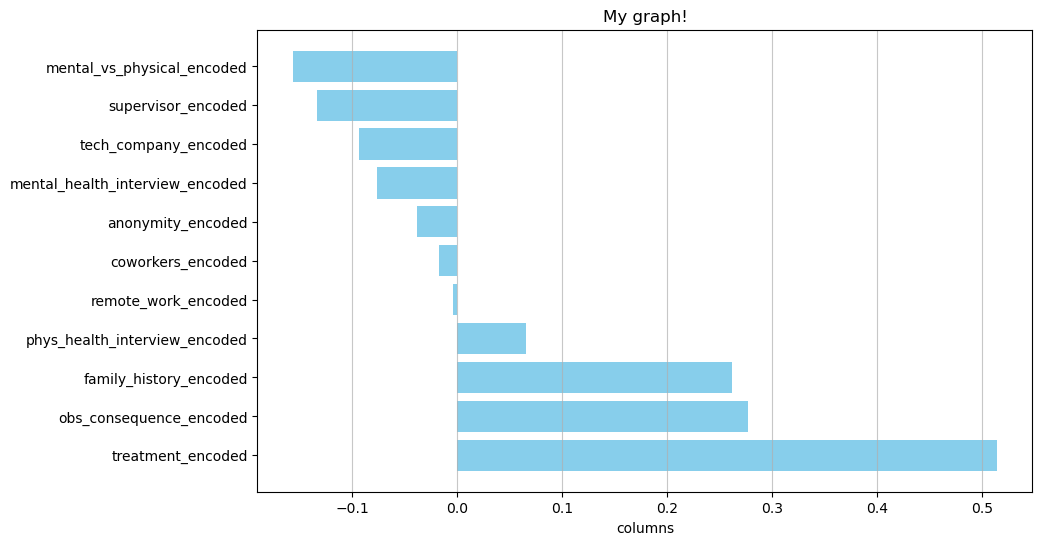

In [67]:
#big_df['work_interfere'] = big_df['work_interfere'].replace(silly_mapping)


key_to_remove = 'work_interfere_encoded'
data_filtered22 = {k: v for k, v in correlations_big.items() if k != key_to_remove and not np.isnan(v)}


categories = list(data_filtered22.keys())

values = list(data_filtered22.values())

plt.figure(figsize=(10,6))
plt.barh(categories, values, color='skyblue')
plt.xlabel('columns')
plt.title('My graph!')
plt.grid(axis='x', alpha=0.7)

plt.show()

In [69]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                    'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female','femail', 'Cis Female', 'cis-female/femme', 
                    'Femake', 'Female (cis)','woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All','ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?','Guy (-ish) ^_^', 'Trans woman',], 'Others', inplace = True)
df.head(20)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
2014-08-27 11:32:05,39,Male,Canada,NaN,NaN,No,No,Never,1-5,Yes,...,Don't know,No,No,No,No,No,No,No,No,NaN
2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
